## Data Analysis of our survey (computer version)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
import networkx as nx
import ast
import math
import re
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint



In [ ]:
df_clean = pd.read_csv('./Adversarial-round1-cleaned.csv')

display(df_clean)

Response Type  Progress  Duration (in seconds)  Finished User Language  \
0     IP Address       100                    347      True            EN   
1     IP Address       100                    241      True            EN   
2     IP Address       100                    612      True            EN   
3     IP Address       100                    524      True            EN   
4     IP Address       100                    306      True            EN   
5     IP Address       100                    587      True            EN   
6     IP Address       100                    242      True            EN   
7     IP Address       100                    336      True            EN   
8     IP Address       100                    426      True            EN   
9     IP Address       100                    366      True            EN   
10    IP Address       100                    458      True            EN   
11    IP Address       100                    583      True            EN   
12    IP Address       100                    398      True            EN   
13    IP Address       100                    467      True            EN   
14    IP Address       100                    414      True            EN   
15    IP Address       100                    291      True            EN   
16    IP Address       100                    579      True            EN   
17    IP Address       100                    400      True            EN   
18    IP Address       100                    574      True            EN   
19    IP Address       100                    220      True            EN   
20    IP Address       100                    600      True            EN   
21    IP Address       100                    463      True            EN   
22    IP Address       100                    518      True            EN   
23    IP Address       100                    584      True            EN   
24    IP Address       100                    563      True            EN   
25    IP Address       100                    547      True            EN   
26    IP Address       100                    553      True            EN   
27    IP Address       100                    680      True            EN   
28    IP Address       100                    586      True            EN   
29    IP Address       100                    568      True            EN   
30    IP Address       100                    337      True            EN   
31    IP Address       100                    602      True            EN   
32    IP Address       100                    610      True            EN   
33    IP Address       100                    649      True            EN   
34    IP Address       100                    608      True            EN   
35    IP Address       100                    225      True            EN   
36    IP Address       100                    737      True            EN   
37    IP Address       100                    598      True            EN   
38    IP Address       100                    673      True            EN   
39    IP Address       100                    834      True            EN   
40    IP Address       100                    676      True            EN   
41    IP Address       100                    587      True            EN   
42    IP Address       100                    927      True            EN   
43    IP Address       100                    708      True            EN   
44    IP Address       100                    970      True            EN   
45    IP Address       100                    612      True            EN   
46    IP Address       100                    410      True            EN   
47    IP Address       100                    628      True            EN   
48    IP Address       100                    762      True            EN   
49    IP Address       100                   1151      True            EN   
50    IP Address       100                    501      True            EN   

### Demographic Analysis

In [236]:
like_native_map = {'First language':True,"Native speaker":True,"Fluent but not native":False,"Conversational":False,"Basic":False}
df_clean["like_native"] = df_clean["What is your level of English proficiency"].map(like_native_map)

# display(df_clean["like_native"].value_counts())
display(df_clean["What is your level of English proficiency"].value_counts())
display(df_clean["Please select your race identity: - Selected Choice"].value_counts())
display(df_clean["What is the highest level of education you are in or have completed? - Selected Choice"].value_counts())
display(df_clean["Please select your gender identity:"].value_counts())
display(df_clean["Which country or region do you currently identify as being from?"].value_counts())
display(df_clean["How long have you been using social media?"].value_counts())

What is your level of English proficiency
First language           35
Native speaker           17
Fluent but not native     8
Name: count, dtype: int64

Please select your race identity: - Selected Choice
White                                             28
Black or African American                         28
Asian,Hispanic or Latino                           1
Another race not listed here (please specify):     1
Hispanic or Latino,White                           1
Hispanic or Latino                                 1
Name: count, dtype: int64

What is the highest level of education you are in or have completed? - Selected Choice
Bachelor’s degree                      19
High school diploma/GED                16
Master's degree or higher education     9
Doctoral (Doctor's) degree              7
Associate degree                        5
Professional school                     4
Name: count, dtype: int64

Please select your gender identity:
Male      31
Female    28
Other      1
Name: count, dtype: int64

Which country or region do you currently identify as being from?
SouthAfrica      22
UnitedKingdom    14
UnitedStates     12
Canada            4
Portugal          2
Poland            2
Latvia            1
Mexico            1
Finland           1
Kenya             1
Name: count, dtype: int64

How long have you been using social media?
10-15 years           24
15-20 years           17
More than 20 years     9
5-10 years             9
1-5 years              1
Name: count, dtype: int64

### Statistics analysis and generate the graphs

In [ ]:
df = pd.read_csv("./Adversarial-round1-cleaned.csv")
display(df)

Response Type  Progress  Duration (in seconds)  Finished User Language  \
0     IP Address       100                    347      True            EN   
1     IP Address       100                    241      True            EN   
2     IP Address       100                    612      True            EN   
3     IP Address       100                    524      True            EN   
4     IP Address       100                    306      True            EN   
5     IP Address       100                    587      True            EN   
6     IP Address       100                    242      True            EN   
7     IP Address       100                    336      True            EN   
8     IP Address       100                    426      True            EN   
9     IP Address       100                    366      True            EN   
10    IP Address       100                    458      True            EN   
11    IP Address       100                    583      True            EN   
12    IP Address       100                    398      True            EN   
13    IP Address       100                    467      True            EN   
14    IP Address       100                    414      True            EN   
15    IP Address       100                    291      True            EN   
16    IP Address       100                    579      True            EN   
17    IP Address       100                    400      True            EN   
18    IP Address       100                    574      True            EN   
19    IP Address       100                    220      True            EN   
20    IP Address       100                    600      True            EN   
21    IP Address       100                    463      True            EN   
22    IP Address       100                    518      True            EN   
23    IP Address       100                    584      True            EN   
24    IP Address       100                    563      True            EN   
25    IP Address       100                    547      True            EN   
26    IP Address       100                    553      True            EN   
27    IP Address       100                    680      True            EN   
28    IP Address       100                    586      True            EN   
29    IP Address       100                    568      True            EN   
30    IP Address       100                    337      True            EN   
31    IP Address       100                    602      True            EN   
32    IP Address       100                    610      True            EN   
33    IP Address       100                    649      True            EN   
34    IP Address       100                    608      True            EN   
35    IP Address       100                    225      True            EN   
36    IP Address       100                    737      True            EN   
37    IP Address       100                    598      True            EN   
38    IP Address       100                    673      True            EN   
39    IP Address       100                    834      True            EN   
40    IP Address       100                    676      True            EN   
41    IP Address       100                    587      True            EN   
42    IP Address       100                    927      True            EN   
43    IP Address       100                    708      True            EN   
44    IP Address       100                    970      True            EN   
45    IP Address       100                    612      True            EN   
46    IP Address       100                    410      True            EN   
47    IP Address       100                    628      True            EN   
48    IP Address       100                    762      True            EN   
49    IP Address       100                   1151      True            EN   
50    IP Address       100                    501      True            EN   

In [238]:
list(df.columns)

['Response Type',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'User Language',
 'What is your level of English proficiency',
 'How many years did you learn English?',
 'Please select your age range:',
 'Please select your race identity: - Selected Choice',
 'Please select your race identity: - Another race not listed here (please specify): - Text',
 'What is the highest level of education you are in or have completed? - Selected Choice',
 'What is the highest level of education you are in or have completed? - Other (Please fill in) - Text',
 'Please select your gender identity:',
 'Which country or region do you currently identify as being from?',
 'Which platform(s) do you currently use? - Selected Choice',
 'Which platform(s) do you currently use? - Other (Please fill in) - Text',
 'How long have you been using social media?',
 'Timing - First Click',
 'Timing - Last Click',
 'Timing - Page Submit',
 'Timing - Click Count',
 'Which of the following comments makes toxic conte

In [239]:
def tmp(i):
    s = re.search(r"\[Field-([0-9]+)-a\]",i,re.MULTILINE)
    return s.groups()[0]
answer_map = {int(tmp(i)):i for i in df.columns if i.startswith("Which of the following comments makes")}
answer_map

{0: 'Which of the following comments makes toxic content more recognizable?\n\nA:\n[Field-0-a]\n\nB:\n[Field-0-b]',
 1: 'Which of the following comments makes toxic content more recognizable?\n\n\nA:\n\n[Field-1-a]\n\n\nB:\n\n[Field-1-b]',
 2: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA:\n\n[Field-2-a]\n\n\n\nB: \n\n[Field-2-b]',
 3: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA: \n\n[Field-3-a]\n\n\n\nB: \n\n[Field-3-b]',
 4: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA: \n\n[Field-4-a]\n\n\n\nB: \n\n[Field-4-b]',
 5: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA: \n\n[Field-5-a]\n\n\n\nB: \n\n[Field-5-b]',
 6: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA: \n\n[Field-6-a]\n\n\n\nB: \n\n[Field-6-b]',
 7: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA: \n\n[Field-7-a]\n\n\n\nB:

In [240]:
def process_participant(df:pd.DataFrame):
    for _,row in df.iterrows():
        for letter in ["a","b"]:
            for id_num in range(20):
                q_num = id_num + 1
                answer = row[answer_map[id_num]]
                count = 0
                if answer.lower()==letter:
                    count = 1
                elif answer.startswith("Both"):
                    count = 1
                else:
                    #print(f"{letter} {answer}")
                    pass
                id_str = f"{id_num}-{letter}-id"
                id = row[id_str]
                if math.isnan(id):
                    print(id_str)
                yield {"id":id,"selected":count,"letter":letter,"user_language":row["User Language"]}
new_df = pd.DataFrame(process_participant(df))
display(new_df)


g = new_df.groupby("id")
r_df = new_df.groupby(['id']).agg(
    selected=('selected', 'sum'),
    appeared=('selected', 'size')
).reset_index()

display(r_df)

display(sum(r_df['appeared']))

19-a-id
19-b-id
19-a-id
19-b-id
19-a-id
19-b-id
19-a-id
19-b-id
19-a-id
19-b-id
19-a-id
19-b-id


id  selected letter user_language
0     365.0         1      a            EN
1      11.0         1      a            EN
2      42.0         1      a            EN
3     361.0         1      a            EN
4     286.0         1      a            EN
...     ...       ...    ...           ...
2395  260.0         1      b            EN
2396  231.0         0      b            EN
2397   57.0         0      b            EN
2398  272.0         1      b            EN
2399  344.0         1      b            EN

[2400 rows x 4 columns]

id  selected  appeared
0      1.0         2         5
1      2.0         1         6
2      3.0         1         5
3      4.0         2         4
4      5.0         3         3
..     ...       ...       ...
424  427.0         7         9
425  428.0         1         6
426  429.0         4         5
427  430.0         3         6
428  431.0         5         7

[429 rows x 3 columns]

2388

In [ ]:
df_database_0526 = pd.read_csv('./generate_transformation_function_0526_rearrange.csv')

display(df_database_0526)

adversarial_text  toxic_phrase_length  \
0    YOU iazu onurz zibwmvpbg qmryslt ypn bxau gynt...                    6   
1    jsip rgogg kgmpfjcmj YOU acekqhs dwi xqdi ifgf...                    6   
2    rryd vptya wqzxtdyxt vvlaflj cfg btlx jbjn YOU...                    6   
3    YO jqmr U hiuri mltmnwxzr ekiyory gvp nywc  \n...                    6   
4    lacf xqrer YO muifpapdv U btjamei bnv blro jht...                    6   
..                                                 ...                  ...   
427  nice hotel expensive parking got good deal sta...                    6   
428  nice hotel expensive parking got good deal sta...                    6   
429  nice hotel expensive parking got good deal sta...                    6   
430  nice hotel expensive yo[0...                    6   
431  nice hotel expensive y parking [3...                    6   

    infected_level          layout      fonttype  viewtype  random_x  \
0             word    left-aligned  cap-flipping     phone      True   
1             word  middle-aligned  cap-flipping     phone      True   
2             word   right-aligned  cap-flipping     phone      True   
3            token    left-aligned  cap-flipping     phone      True   
4            token  middle-aligned  cap-flipping     phone      True   
..             ...             ...           ...       ...       ...   
427          token   anti-diagonal     highlight  computer     False   
428          mixed   anti-diagonal     highlight  computer     False   
429           word          random     highlight  computer     False   
430          token          random     highlight  computer     False   
431          mixed          random     highlight  computer     False   

     index_0526_rearrange  
0                       0  
1                      36  
2                      72  
3                      12  
4                      48  
..                    ...  
427                   383  
428                   395  
429                   407  
430                   419  
431                   431  

[432 rows x 8 columns]

In [242]:
# Calculate the number of questions which are matched transformation rules appeared times and selected times  
df_find_rule = r_df.merge(
    df_database_0526,
    left_on='id',
    right_on='index_0526_rearrange',
    how = 'left'
)

display(df_find_rule)
display(sum(df_find_rule['appeared']))

id  selected  appeared  \
0      1.0         2         5   
1      2.0         1         6   
2      3.0         1         5   
3      4.0         2         4   
4      5.0         3         3   
..     ...       ...       ...   
424  427.0         7         9   
425  428.0         1         6   
426  429.0         4         5   
427  430.0         3         6   
428  431.0         5         7   

                                      adversarial_text  toxic_phrase_length  \
0    YOU nice hotel expensive parking got good deal...                    6   
1    ___ iazu onurz zibwmvpbg qmryslt ypn bxau gynt...                    6   
2    ___ nice hotel expensive parking got good deal...                    6   
3    ⓨⓞⓤ iazu onurz zibwmvpbg qmryslt ypn bxau gynt...                    6   
4    ⓨⓞⓤ nice hotel expensive parking got good deal...                    6   
..                                                 ...                  ...   
424  nice hotel expensive y parking o[...                    6   
425  svwr uskzy otqiveohh y paqshpp o...                    6   
426  nice hotel expensive y parking o...                    6   
427  svwr uskzy otqiveohh y paqshpp [3...                    6   
428  nice hotel expensive y parking [3...                    6   

    infected_level        layout      fonttype  viewtype  random_x  \
0             word  left-aligned  cap-flipping     phone     False   
1             word  left-aligned         cloze     phone      True   
2             word  left-aligned         cloze     phone     False   
3             word  left-aligned   precomposed     phone      True   
4             word  left-aligned   precomposed     phone     False   
..             ...           ...           ...       ...       ...   
424          mixed        random          bold  computer     False   
425          mixed        random         color  computer      True   
426          mixed        random         color  computer     False   
427          mixed        random     highlight  computer      True   
428          mixed        random     highlight  computer     False   

     index_0526_rearrange  
0                       1  
1                       2  
2                       3  
3                       4  
4                       5  
..                    ...  
424                   427  
425                   428  
426                   429  
427                   430  
428                   431  

[429 rows x 11 columns]

2388

In [243]:
df_find_rule.to_csv("computer_rule_match.csv", index=False)

### Calculation

In [244]:
# Group by them based on layout, infected_level and font type
g = df_find_rule.groupby(["layout","infected_level","fonttype"]).agg(
    selected=("selected","sum"),
    appeared=("appeared","sum")
).reset_index()

g["rate"] = g["selected"]/g['appeared']

g = g.sort_values("rate", ascending=False)

display(g)

layout infected_level   fonttype  selected  appeared      rate
106   right-aligned           word  highlight        21        22  0.954545
52     left-aligned           word  highlight        25        27  0.925926
70   middle-aligned           word  highlight        25        27  0.925926
28         diagonal          token  highlight        12        13  0.923077
48     left-aligned           word       bold        24        26  0.923077
..              ...            ...        ...       ...       ...       ...
38     left-aligned          mixed      cloze         2        28  0.071429
86           random           word      cloze         1        22  0.045455
62   middle-aligned          token      cloze         1        25  0.040000
14    anti-diagonal           word      cloze         1        25  0.040000
98    right-aligned          token      cloze         1        29  0.034483

[108 rows x 6 columns]

In [245]:
# export g as csv
g.to_csv('all-computer-statistic.csv', index = False)

In [246]:
df_all_computer = g
display(df_all_computer)

layout infected_level   fonttype  selected  appeared      rate
106   right-aligned           word  highlight        21        22  0.954545
52     left-aligned           word  highlight        25        27  0.925926
70   middle-aligned           word  highlight        25        27  0.925926
28         diagonal          token  highlight        12        13  0.923077
48     left-aligned           word       bold        24        26  0.923077
..              ...            ...        ...       ...       ...       ...
38     left-aligned          mixed      cloze         2        28  0.071429
86           random           word      cloze         1        22  0.045455
62   middle-aligned          token      cloze         1        25  0.040000
14    anti-diagonal           word      cloze         1        25  0.040000
98    right-aligned          token      cloze         1        29  0.034483

[108 rows x 6 columns]

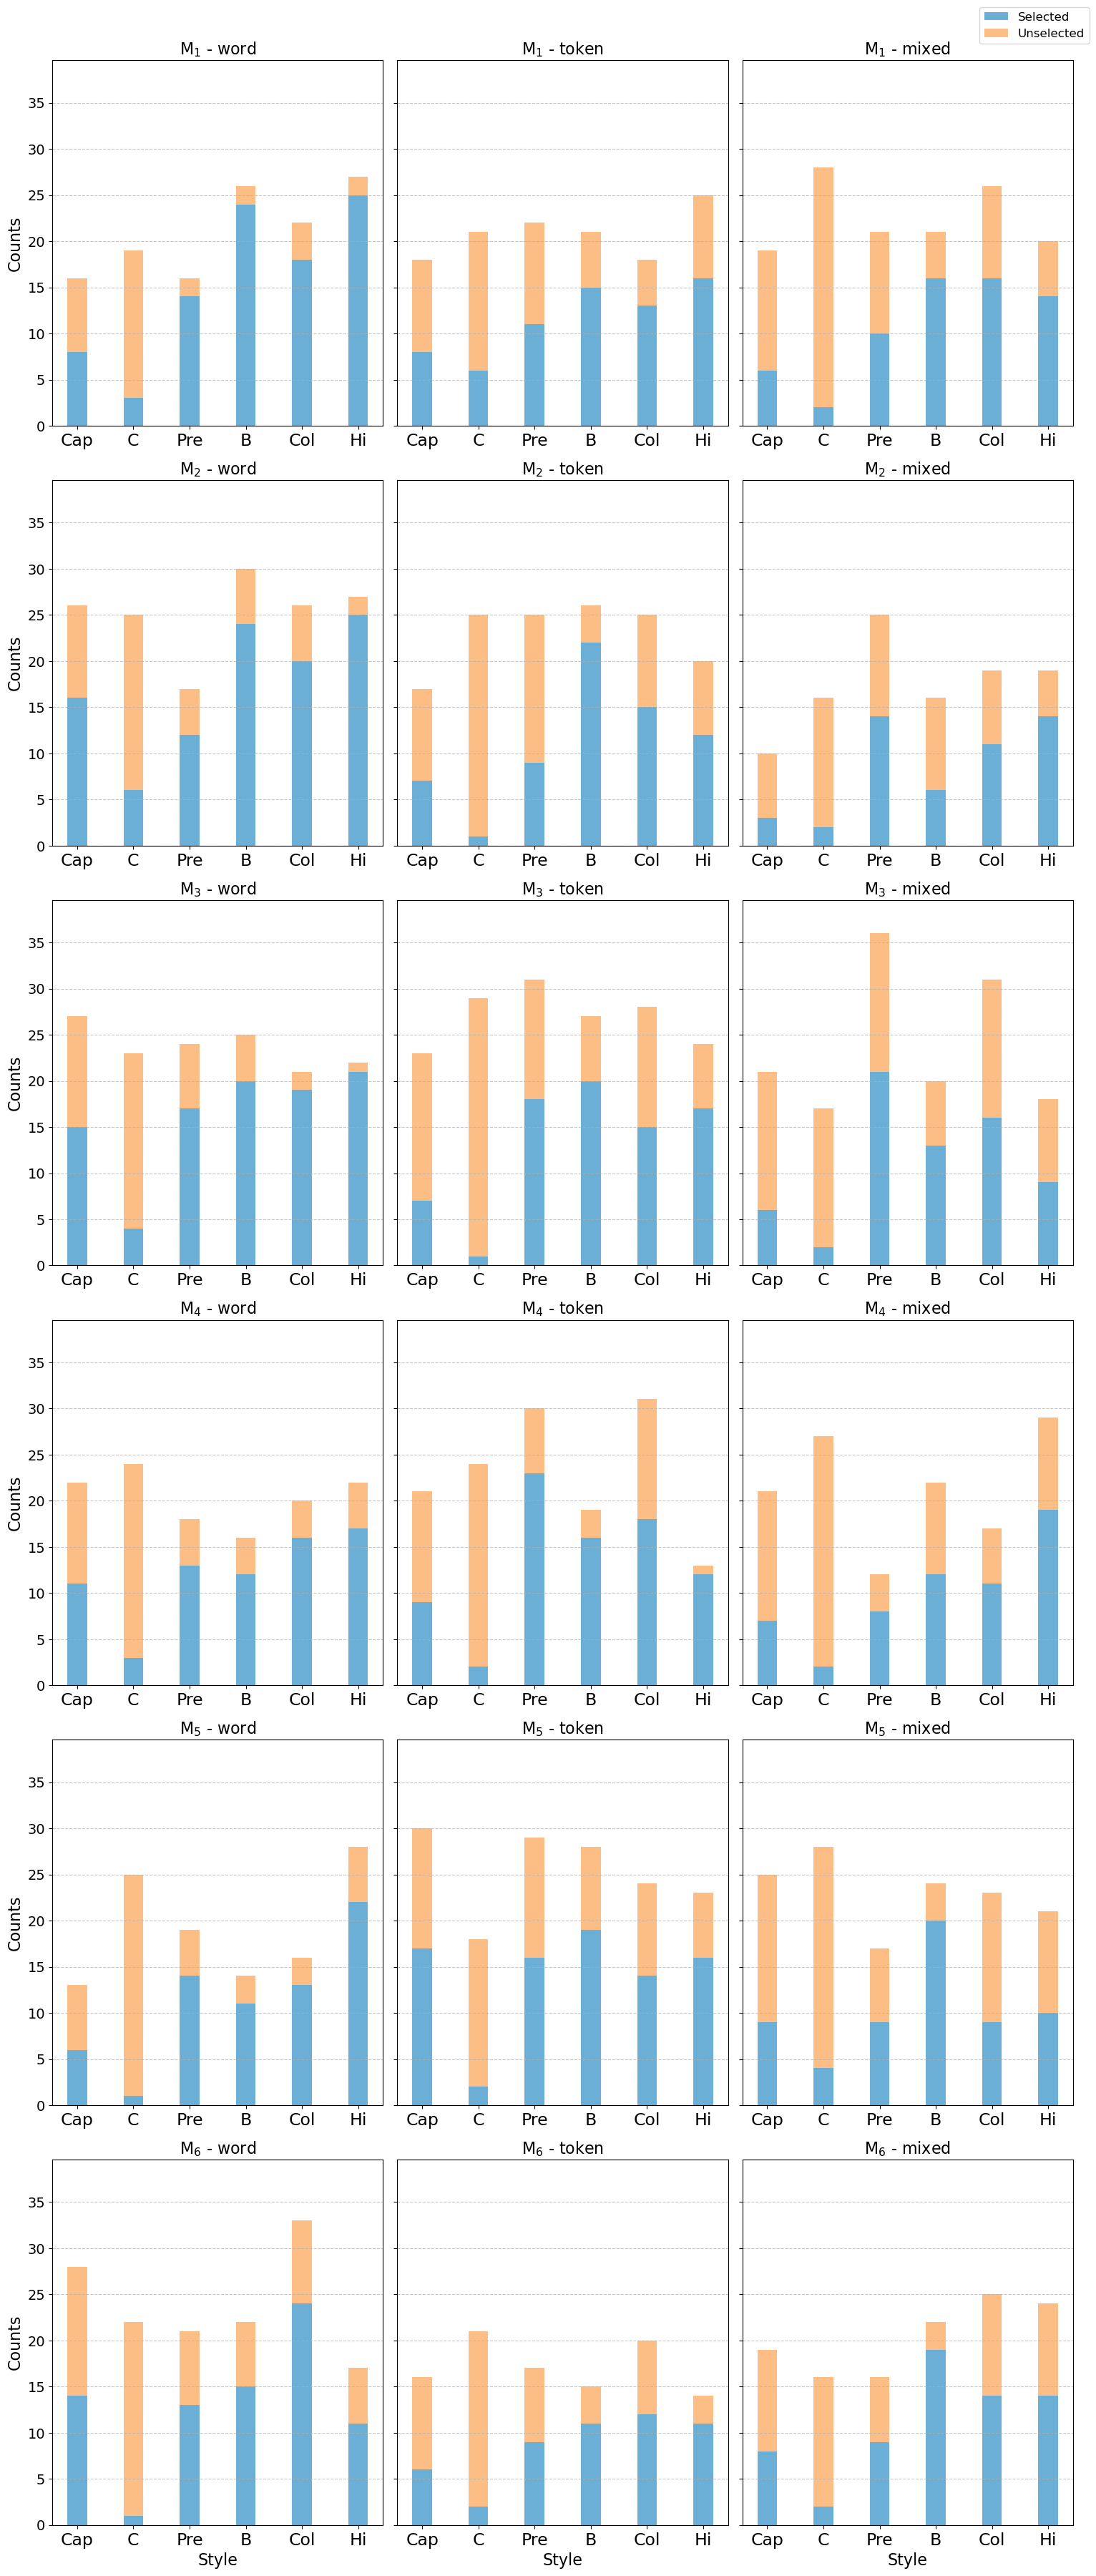

In [ ]:
# Generate graph -- for computer data, each type, selected and appeared performance statistic analysis
df = df_all_computer

# Calculate 'unselected' counts
df['unselected'] = df['appeared'] - df['selected']

layouts = [
    'left-aligned',
    'middle-aligned', 
    'right-aligned',
    'diagonal',
    'anti-diagonal',
    'random'
]

layout_to_m = {
    'left-aligned':  r'M$_1$',
    'middle-aligned': r'M$_2$',
    'right-aligned': r'M$_3$',
    'diagonal': r'M$_4$',
    'anti-diagonal': r'M$_5$',
    'random': r'M$_6$'
}

infected_levels = ['word', 'token', 'mixed']
fonttypes = ['cap-flipping', 'cloze', 'precomposed', 'bold', 'color', 'highlight']
fonttype_to_short = {
    'cap-flipping': 'Cap',  
    'cloze': 'C',
    'precomposed': 'Pre',
    'bold': 'B',
    'color': 'Col',
    'highlight': 'Hi'
}

n_layouts = len(layouts)
n_infected_levels = len(infected_levels)

# Create the figure and subplots
fig, axes = plt.subplots(n_layouts, n_infected_levels, figsize=(16, 6 * n_layouts), sharey=True, squeeze=False)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# Width for each bar in a cluster
bar_width = 0.35 

# Define colors for 'selected' and 'unselected'
selected_color = '#6baed6' # A shade of blue
unselected_color = '#fdbe85' # A shade of orange

# Loop through each layout (rows of subplots)
for i, current_layout in enumerate(layouts):
    for j, current_infected_level in enumerate(infected_levels):
        ax = axes[i, j]

        subplot_df = df[(df['layout'] == current_layout) & (df['infected_level'] == current_infected_level)]

        fonttypes_for_plot = fonttypes

        index = np.arange(len(fonttypes_for_plot))

        # Stacked bars
        selected_counts = []
        unselected_counts = []
        appeared_totals = []

        for ftype in fonttypes_for_plot:
            ftype_data = subplot_df[subplot_df['fonttype'] == ftype]
            if not ftype_data.empty:
                selected_counts.append(ftype_data['selected'].values[0])
                unselected_counts.append(ftype_data['unselected'].values[0])
                appeared_totals.append(ftype_data['appeared'].values[0])
            else:
                selected_counts.append(0)
                unselected_counts.append(0)
                appeared_totals.append(0)


        # Plot selected bars
        rects_selected = ax.bar(index, selected_counts, bar_width, label='Selected', color=selected_color)
        rects_unselected = ax.bar(index, unselected_counts, bar_width, bottom=selected_counts, label='Unselected', color=unselected_color)


        layout_label = layout_to_m.get(current_layout, current_layout)

        # Customize subplot titles and labels
        ax.set_title(f'{layout_label} - {current_infected_level}', fontsize=16)
        short_labels = [fonttype_to_short[ft] for ft in fonttypes_for_plot]


        ax.set_xticks(index)
        ax.set_xticklabels(short_labels, rotation=0, ha='center', fontsize=17) 
        # Set Y-axis label only for the first column of subplots
        if j == 0:
            ax.set_ylabel('Counts', fontsize=16)
        # Set X-axis label only for the bottom row of subplots
        if i == n_layouts - 1:
            ax.set_xlabel('Style', fontsize=16)

        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='y', labelsize=14)


# Set a common Y-axis limit for all subplots based on the maximum 'appeared' value
max_appeared = df['appeared'].max()
for row_axes in axes:
    for ax in row_axes:
        ax.set_ylim(0, max_appeared * 1.1) 


# Create a legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.96, 1.001), frameon=True, fontsize=12)

# Adjust rect to make space for the overall title and legend
plt.tight_layout(rect=[0, 0, 0.95, 0.99]) 

plt.savefig('Computer - Selected vs. Appeared Counts.pdf')

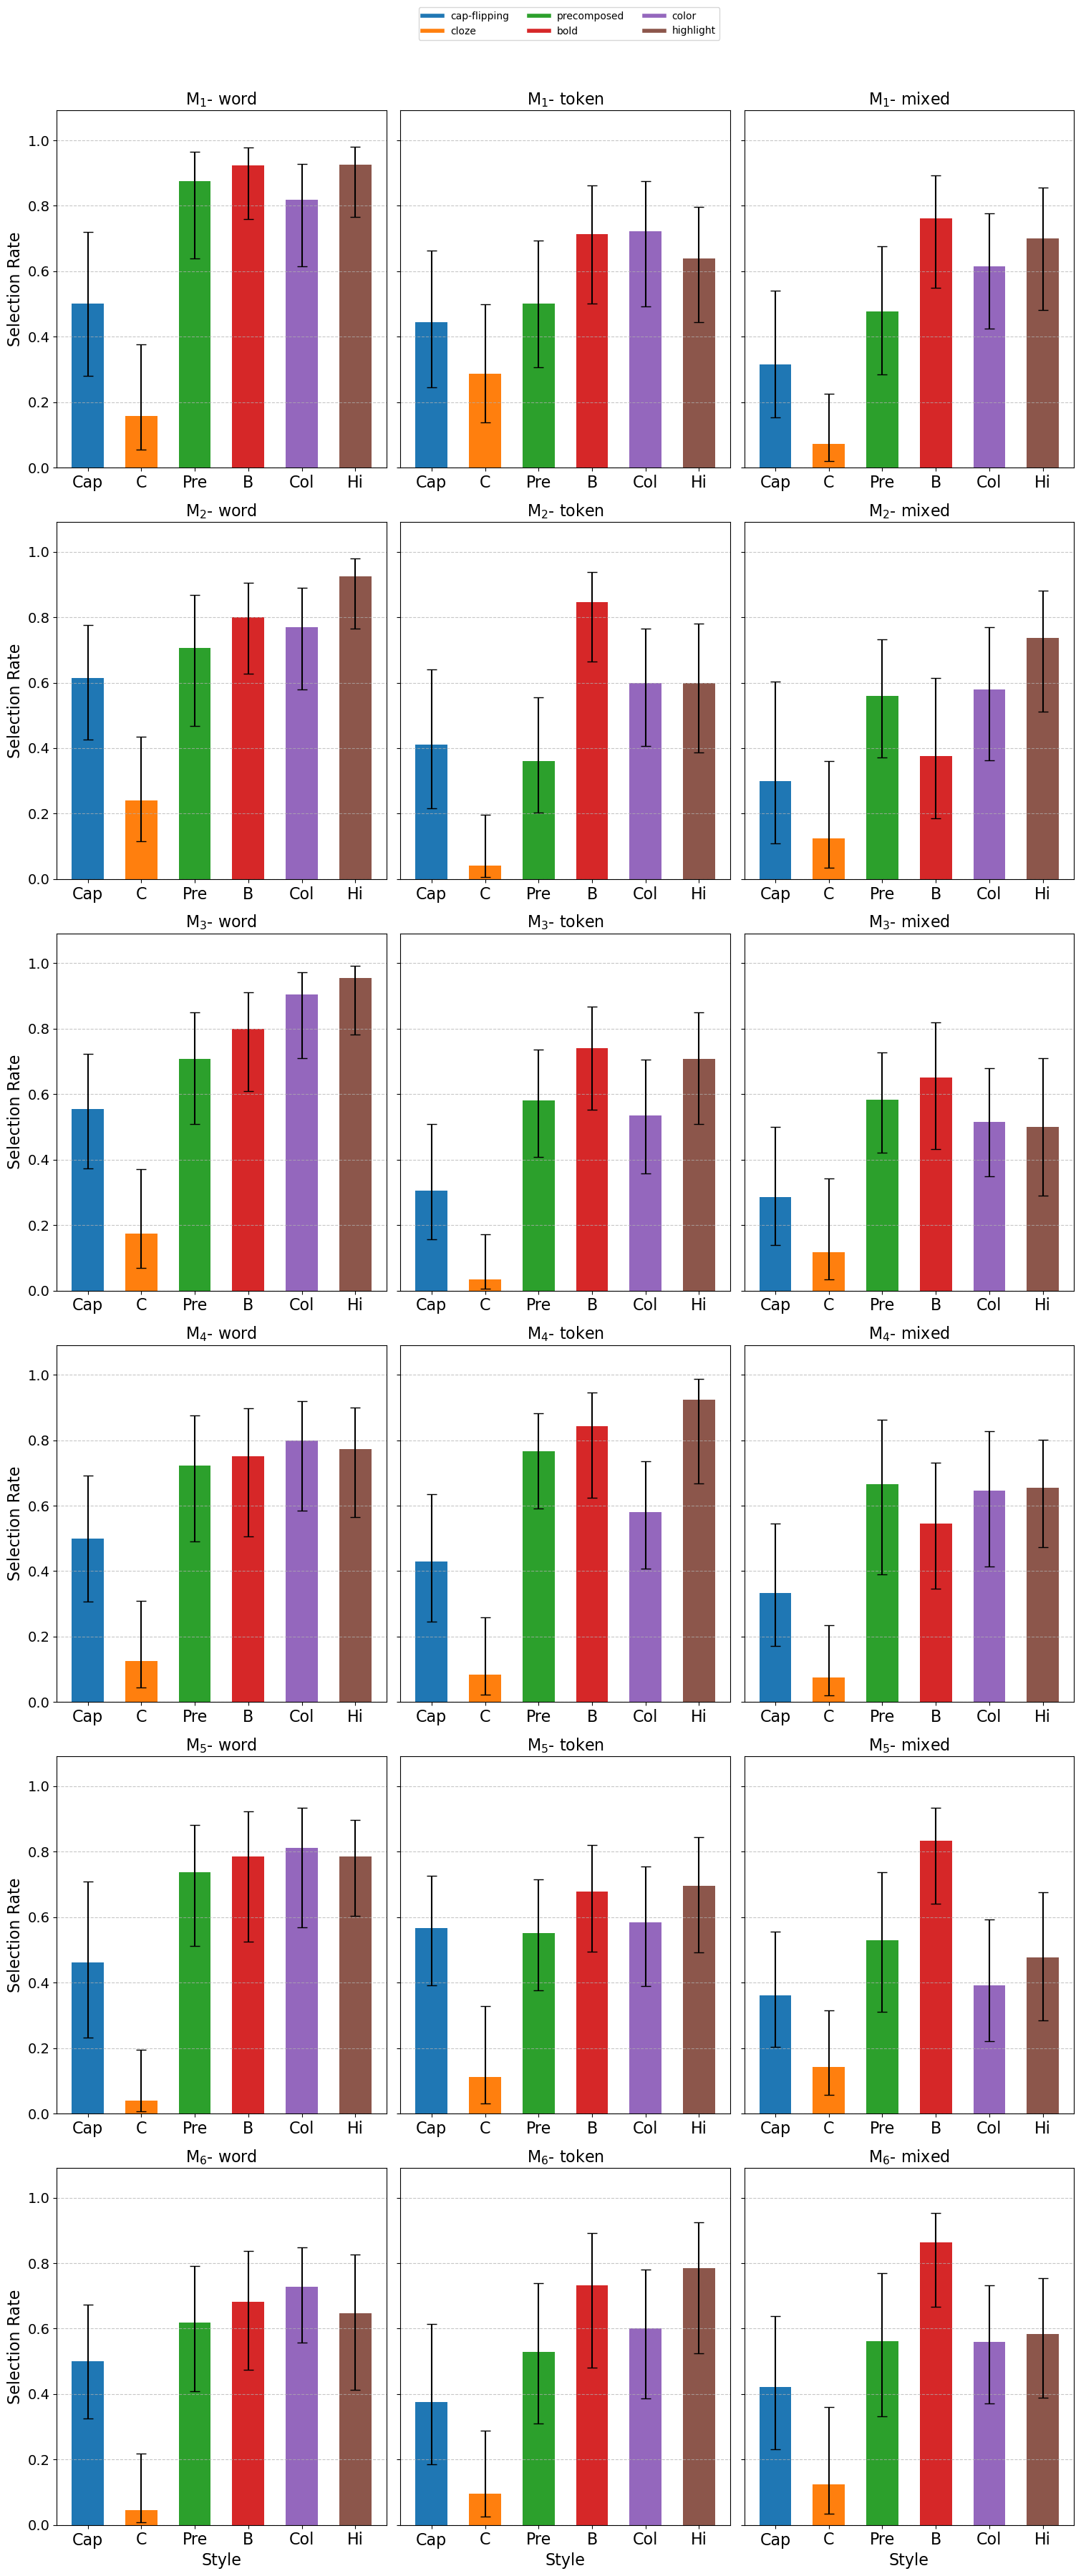

In [248]:
df_rate_graph = df_all_computer

# Calculate Binomial Confidence Intervals for the 'rate'
df_rate_graph['rate_ci_lower'] = np.nan
df_rate_graph['rate_ci_upper'] = np.nan

for index, row in df_rate_graph.iterrows():
    if row['appeared'] > 0:
        conf_int_lower, conf_int_upper = proportion_confint(
            count=row['selected'],
            nobs=row['appeared'],
            alpha=0.05, # For 95% confidence interval
            method='wilson' # A robust method for binomial proportions
        )
        df_rate_graph.at[index, 'rate_ci_lower'] = conf_int_lower
        df_rate_graph.at[index, 'rate_ci_upper'] = conf_int_upper
    else:
        # If 'appeared' is 0, the rate is 0, and the confidence interval is [0,0]
        df_rate_graph.at[index, 'rate_ci_lower'] = 0.0
        df_rate_graph.at[index, 'rate_ci_upper'] = 0.0

# Calculate the error bar lengths from the mean rate
df_rate_graph['error_lower'] = df_rate_graph['rate'] - df_rate_graph['rate_ci_lower']
df_rate_graph['error_upper'] = df_rate_graph['rate_ci_upper'] - df_rate_graph['rate']

# Prepare data for plotting
# layouts = [
#     'left-aligned',
#     'middle-aligned', 
#     'right-aligned',
#     'diagonal',
#     'anti-diagonal',
#     'random'
# ]

layout_to_m = {
    'left-aligned':  r'M$_1$',
    'middle-aligned': r'M$_2$',
    'right-aligned': r'M$_3$',
    'diagonal': r'M$_4$',
    'anti-diagonal': r'M$_5$',
    'random': r'M$_6$'
}

infected_levels = ['word', 'token', 'mixed']
all_fonttypes = ['cap-flipping', 'cloze', 'precomposed', 'bold', 'color', 'highlight']
all_fonttype_to_short = {
    'cap-flipping': 'Cap',  
    'cloze': 'C',
    'precomposed': 'Pre',
    'bold': 'B',
    'color': 'Col',
    'highlight': 'Hi'
}

n_layouts = len(layouts)
n_infected_levels = len(infected_levels)

# Create the figure and subplots for rate with CI
fig, axes = plt.subplots(n_layouts, n_infected_levels, figsize=(16, 6 * n_layouts), sharey=True, squeeze=False)

# Adjust spacing 
plt.subplots_adjust(wspace=0.25, hspace=0.4) 

bar_width = 0.6 # Width for each bar

colors = sns.color_palette("tab10", n_colors=len(all_fonttypes))

# Mapping from fonttype to color for consistent coloring across subplots
fonttype_color_map = {ftype: colors[i] for i, ftype in enumerate(all_fonttypes)}


for i, current_layout in enumerate(layouts):
    for j, current_infected_level in enumerate(infected_levels):
        ax = axes[i, j]
        subplot_df = df_rate_graph[(df_rate_graph['layout'] == current_layout) & (df_rate_graph['infected_level'] == current_infected_level)]
        x_positions = np.arange(len(all_fonttypes))

        # Plot bars for each fonttype
        for k, ftype in enumerate(all_fonttypes): 
            ftype_data = subplot_df[subplot_df['fonttype'] == ftype] 
            if not ftype_data.empty: 
                rate_val = ftype_data['rate'].values[0]
                error_lower_val = ftype_data['error_lower'].values[0]
                error_upper_val = ftype_data['error_upper'].values[0]

                ax.bar(x_positions[k], rate_val, bar_width,
                       yerr=[[error_lower_val], [error_upper_val]], 
                       capsize=5,
                       label=ftype,
                       color=fonttype_color_map[ftype])
        
        display_layout_name = current_layout
        if display_layout_name == 'middle-aligned':
            display_layout_name = 'center-aligned'

        # Customize subplot titles and labels
        layout_label = layout_to_m.get(current_layout, current_layout)

        ax.set_title(f'{layout_label}- {current_infected_level}', fontsize=16)
        short_labels = [all_fonttype_to_short[ft] for ft in all_fonttypes]

        ax.set_xticks(x_positions)
        ax.set_xticklabels(short_labels, rotation=0, ha='center', fontsize=16) 

        # Set Y-axis label only for the first column of subplots
        if j == 0:
            ax.set_ylabel('Selection Rate', fontsize=16)
        # Set X-axis label only for the bottom row of subplots
        if i == n_layouts - 1:
            ax.set_xlabel('Style', fontsize=16)

        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='y', labelsize=14)


# Set a common Y-axis limit for all subplots based on the maximum 'rate' value (including upper CI)
max_rate = df_rate_graph['rate_ci_upper'].max()
for row_axes in axes:
    for ax in row_axes:
        ax.set_ylim(0, max_rate * 1.1) 

# Create a single legend for the entire figure (for fonttypes)
handles = [plt.Line2D([0], [0], color=fonttype_color_map[ftype], lw=4) for ftype in all_fonttypes]
labels = all_fonttypes

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.00), ncol=3, frameon=True, fontsize=10)


plt.tight_layout(rect=[0, 0, 0.95, 0.97]) 

plt.savefig('Computer - Selection Rate by Mode, Level, and Style with 95% Confidence Intervals.pdf')

